# Lesson 1: Non-Linear Boundaries
Data cannot always be organized with a straight line...so we need deep neural networks. Need a non-linear model to obtain the curve, so we combine two linear models to get something else. 2 perceptrons into a 3rd one. 

Combine 2 linear models to combine a linear combination to make a non-linear model. We multiply each linear model by some weight and then multiply some bias value. The linear combination then applied to the sigmoid activation function. Input with the highest weight has the greater affect on the model and dictates what the model looks like. 

Linear combining exisiting models is the core of making a more non-linear complex model. 

# Lesson 2: Architecture
When combine perceptrons together, apply sigmoid, we can get a probabiility. 

Weights dictate how linear models combine. 
First layer = first linear model. --> two linear models
First layer = second linear model
Second layer = linear combination of first and second linear model, take sigmoid, convert to a probability

This is the feedforward process. 

more hidden layers = deeper the neural network gets

combine models, to get nonlinear models. to gget a better model to classify complex data

# Feedforward process
Combination of linear models can create more complex non-linear models.
How do you figure out the weights? Still use gradient descent, ensuring the minimal error

Feedforward = core of nn, (e.g. CNN), aren't feedback loops/conentions. ONly input, hidden, and output layer
#hidden layers = deepth of nn
input = provides data
output = makes predictions on data, based on activation functions

1st) input fed into network 

In [ ]:
# Error Function

# Backpropagation 
-gradient = takes us to the lowest/smallest error 

In [1]:
#Code Implementation
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

In [13]:
n_pts = 500
x, y = datasets.make_circles(n_samples=n_pts, random_state=123, noise=0.1, factor=0.2) #noise low so not too convoluted, factor, smaller inner circle
x_data = torch.Tensor(x)
y_data = torch.Tensor(y.reshape(500, 1))

In [14]:
def scatter_plot():
    plt.scatter(x[y==0, 0], x[y==0, 1])
    plt.scatter(x[y==1, 0], x[y==1, 1])

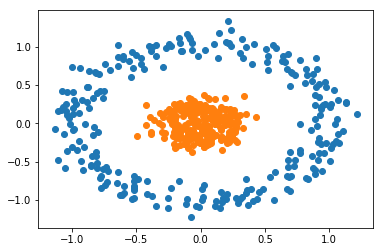

In [15]:
scatter_plot()

In [16]:
class Model(nn.Module):
    def __init__(self, input_size, H1, output_size): #H1 is the hidden layer
        super().__init__()
        self.linear = nn.Linear(input_size, H1)
        self.linear2 = nn.Linear(H1, output_size)
        
    #have to account for hidden layer with forward function
    def forward(self, x):
        x = torch.sigmoid(self.linear(x))
        x = torch.sigmoid(self.linear2(x))
        return x
    def predict(self, x):
        pred = self.forward(x)
        if pred >= 0.5:
            return 1
        else:
            return 0
    

In [17]:
torch.manual_seed(2)
model = Model(2, 4, 1)
print(list(model.parameters())) #have many more weight and bias parameters 

[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717]], requires_grad=True), Parameter containing:
tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True), Parameter containing:
tensor([[-0.1099,  0.4088,  0.0334,  0.2073]], requires_grad=True), Parameter containing:
tensor([0.2116], requires_grad=True)]


In [22]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1) #Adam = a new otpimizer
#need to pick a proper learning rate (too slow, or diverge) 
#adam computes adaptive learning rates for each parameter, very popular and efficent with large models and data sets
#currently recommended as default

In [23]:
epochs = 1000
losses = []
for i in range(epochs):
    y_pred = model.forward(x_data)
    loss = criterion(y_pred, y_data)
    print("epochs", i, "loss", loss.item())
    losses.append(loss.item()) #appending the loss value after each iteration to visualize the decrease, see improvements
    optimizer.zero_grad() #need to set grad to zero. Gradient accumulates in the backwards call. 
    loss.backward() #computes the gradient
    optimizer.step() #

epochs 0 loss 0.03219418600201607
epochs 1 loss 0.03053552471101284
epochs 2 loss 0.029004229232668877
epochs 3 loss 0.027608314529061317
epochs 4 loss 0.02624846249818802
epochs 5 loss 0.024970538914203644
epochs 6 loss 0.02376616559922695
epochs 7 loss 0.02260502055287361
epochs 8 loss 0.0215225201100111
epochs 9 loss 0.02052159421145916
epochs 10 loss 0.01957590878009796
epochs 11 loss 0.01868094503879547
epochs 12 loss 0.017843440175056458
epochs 13 loss 0.017055228352546692
epochs 14 loss 0.01630709134042263
epochs 15 loss 0.015602757222950459
epochs 16 loss 0.014944705180823803
epochs 17 loss 0.014326519332826138
epochs 18 loss 0.01374280545860529
epochs 19 loss 0.013193628750741482
epochs 20 loss 0.012678015045821667
epochs 21 loss 0.012191248126327991
epochs 22 loss 0.011729707010090351
epochs 23 loss 0.011293437331914902
epochs 24 loss 0.010882899165153503
epochs 25 loss 0.01049618236720562
epochs 26 loss 0.010130530223250389
epochs 27 loss 0.009784487076103687
epochs 28 loss 

epochs 332 loss 0.00039478970575146377
epochs 333 loss 0.0003930672537535429
epochs 334 loss 0.00039135778206400573
epochs 335 loss 0.0003896623384207487
epochs 336 loss 0.0003879788564518094
epochs 337 loss 0.00038630765629932284
epochs 338 loss 0.0003846479521598667
epochs 339 loss 0.0003830002387985587
epochs 340 loss 0.00038136658258736134
epochs 341 loss 0.00037974512088112533
epochs 342 loss 0.000378133641788736
epochs 343 loss 0.00037653581239283085
epochs 344 loss 0.0003749488387256861
epochs 345 loss 0.00037337112007662654
epochs 346 loss 0.0003718071966432035
epochs 347 loss 0.00037025337223894894
epochs 348 loss 0.00036871267366223037
epochs 349 loss 0.0003671810554806143
epochs 350 loss 0.0003656616318039596
epochs 351 loss 0.00036415099748410285
epochs 352 loss 0.0003626554680522531
epochs 353 loss 0.00036116514820605516
epochs 354 loss 0.0003596878086682409
epochs 355 loss 0.0003582201898097992
epochs 356 loss 0.00035676435800269246
epochs 357 loss 0.00035531926550902426


epochs 619 loss 0.00015842297580093145
epochs 620 loss 0.0001580296957399696
epochs 621 loss 0.00015763461124151945
epochs 622 loss 0.00015724492550361902
epochs 623 loss 0.00015685522521380335
epochs 624 loss 0.000156465990585275
epochs 625 loss 0.0001560782257001847
epochs 626 loss 0.00015568944218102843
epochs 627 loss 0.00015530906966887414
epochs 628 loss 0.00015492414240725338
epochs 629 loss 0.00015453979722224176
epochs 630 loss 0.0001541591773275286
epochs 631 loss 0.00015377948875539005
epochs 632 loss 0.00015340208483394235
epochs 633 loss 0.0001530249137431383
epochs 634 loss 0.00015264902322087437
epochs 635 loss 0.00015227282710839063
epochs 636 loss 0.0001518998178653419
epochs 637 loss 0.00015152514970395714
epochs 638 loss 0.00015115358110051602
epochs 639 loss 0.00015078476280905306
epochs 640 loss 0.00015041462029330432
epochs 641 loss 0.0001500460202805698
epochs 642 loss 0.0001496797049185261
epochs 643 loss 0.00014931410260032862
epochs 644 loss 0.0001489464630139

epochs 838 loss 9.47782609728165e-05
epochs 839 loss 9.45709107327275e-05
epochs 840 loss 9.436131949769333e-05
epochs 841 loss 9.415183012606576e-05
epochs 842 loss 9.394341759616509e-05
epochs 843 loss 9.373703505843878e-05
epochs 844 loss 9.352803317597136e-05
epochs 845 loss 9.332462650490925e-05
epochs 846 loss 9.311715984949842e-05
epochs 847 loss 9.291019523516297e-05
epochs 848 loss 9.270690497942269e-05
epochs 849 loss 9.250410221284255e-05
epochs 850 loss 9.229891293216497e-05
epochs 851 loss 9.210052667185664e-05
epochs 852 loss 9.189675620291382e-05
epochs 853 loss 9.169585246127099e-05
epochs 854 loss 9.149567631538957e-05
epochs 855 loss 9.129466343438253e-05
epochs 856 loss 9.109602979151532e-05
epochs 857 loss 9.089823288377374e-05
epochs 858 loss 9.069900261238217e-05
epochs 859 loss 9.050215885508806e-05
epochs 860 loss 9.030556248035282e-05
epochs 861 loss 9.010715439217165e-05
epochs 862 loss 8.99116275832057e-05
epochs 863 loss 8.971991337602958e-05
epochs 864 loss

Text(0.5,0,'epoch')

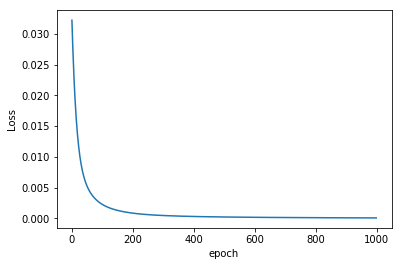

In [24]:
plt.plot(range(epochs), losses) #process starts to lag at a certain point. shows that learning rate of 0.01 is slow
plt.ylabel('Loss') #0.1 learning process shows a steeper curve, so we don't even need 1000 epochs
plt.xlabel('epoch')

In [36]:
#Testing model
#create a decisive boundary layer

#define function 
def plot_decision_boundary(x, y):
    x_span = np.linspace(min(x[:, 0]) - 0.25, max(x[:, 0]) + 0.25) #all rows, in column with index 0 (which is x values)
    #print(x_span)
    y_span = np.linspace(min(x[:, 1]) - 0.25, max(x[:, 1]) + 0.25) #all rows, in column with index 1 (which is y values)
    #print(y_span)
    
    xx, yy = np.meshgrid(x_span, y_span) #take the x vector and return a 2D 50x50 matrix, repeated copies of the xspan vector same with y
    #50x50 grid, that spans entire horizontal and vertical data, we can then make cartesian grid that covers the set
    #need to flatten 2D into 1D with ravel
    grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
    pred_func = model.forward(grid)
    z = pred_func.view(xx.shape).detach().numpy() #detach used to avoid error, so we can convert to numpy 
    plt.contourf(xx, yy, z)

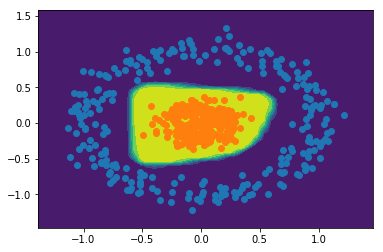

In [37]:
plot_decision_boundary(x, y) #should return contour plot of the decision boundary
#get 50 equal spaced points from min to max
scatter_plot()

Prediction is 1


TypeError: 'float' object is not subscriptable

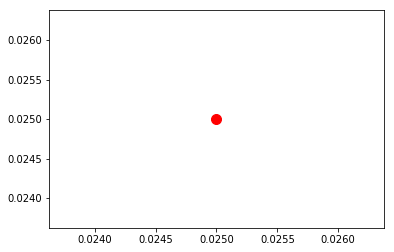

In [41]:
x = 0.025
y = 0.025
point = torch.Tensor([x, y])
prediction = model.predict(point)
plt.plot([x], [y], marker = 'o', markersize = 10, color = 'r')
print("Prediction is", prediction)
plot_decision_boundary(x, y)